## Proyek Machine Learning Prediksi Hasil Panen - Natalio Michael Tumuahi

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
%matplotlib inline

## **Data Loading**


In [2]:
url = 'https://raw.githubusercontent.com/natalio123/prediksi_hasil_panen/master/dataset/crop_yield.csv'
df = pd.read_csv(url)
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


## Data Understanding

### Explanatory Data Analysis

In [3]:
# Deskripsi variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [4]:
df.describe(include='all')

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
count,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000,1000000,1000000,1000000.000000,1000000.000000
unique,4,6,6,NaN,NaN,2,2,3,NaN,NaN
top,North,Sandy,Maize,NaN,NaN,False,False,Sunny,NaN,NaN
freq,250173,167119,166824,NaN,NaN,500060,500509,333790,NaN,NaN
mean,NaN,NaN,NaN,549.981901,27.504965,NaN,NaN,NaN,104.495025,4.649472
std,NaN,NaN,NaN,259.851320,7.220608,NaN,NaN,NaN,25.953412,1.696572
min,NaN,NaN,NaN,100.000896,15.000034,NaN,NaN,NaN,60.000000,-1.147613
25%,NaN,NaN,NaN,324.891090,21.254502,NaN,NaN,NaN,82.000000,3.417637
50%,NaN,NaN,NaN,550.124061,27.507365,NaN,NaN,NaN,104.000000,4.651808
75%,NaN,NaN,NaN,774.738520,33.753267,NaN,NaN,NaN,127.000000,5.879200


In [5]:
# cek nilai missing value
missing_percent = df.isnull().mean() * 100
missing_percent

,0
Region,0.0
Soil_Type,0.0
Crop,0.0
Rainfall_mm,0.0
Temperature_Celsius,0.0
Fertilizer_Used,0.0
Irrigation_Used,0.0
Weather_Condition,0.0
Days_to_Harvest,0.0
Yield_tons_per_hectare,0.0


Insight: <br>
Berdasarkan analisis terhadap nilai missing value, seluruh kolom dalam dataset tidak memiliki missing value. Dengan demikian, tidak diperlukan proses imputasi atau pengisian data, dan data dapat langsung digunakan untuk tahap selanjutnya. Ketersediaan data yang lengkap ini membantu menjaga kualitas dan keandalan model.

In [6]:
# cek duplicate
duplikat = df.duplicated().sum()
duplikat

np.int64(0)

Insight: <br>
Berdasarkan pemeriksaan duplikasi data, tidak ditemukan adanya data yang terduplikat dalam dataset. Hal ini menunjukkan bahwa setiap observasi bersifat unik, sehingga tidak diperlukan tindakan tambahan untuk menghapus data duplikat. Kondisi ini mendukung kualitas data yang baik untuk proses modeling selanjutnya.

<Axes: xlabel='Crop'>

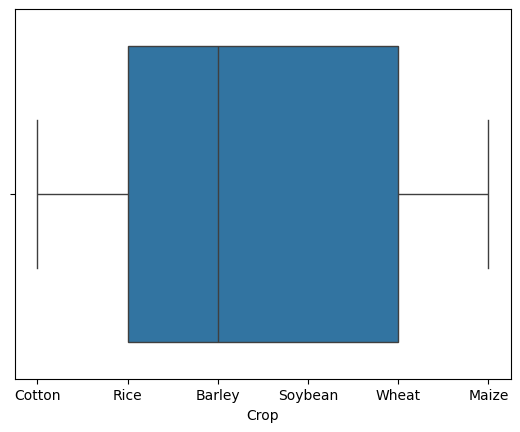

In [7]:
# Cek outliers
sns.boxplot(x=df['Crop'])

Insight: <br>
Berdasarkan analisis boxplot pada fitur jenis tanaman (Crop) menunjukkan pola yang relatif seragam di antara tanaman Barley, Soybean, dan Wheat dengan distribusi hasil panen yang hampir identik, sementara tanaman Cotton, Rice, dan Maize menampilkan nilai outlier yang ditandai dengan whisker yang lebih panjang di luar batas kuartil.

<Axes: xlabel='Days_to_Harvest'>

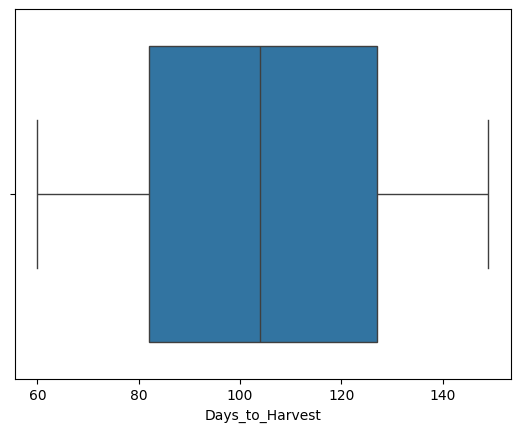

In [8]:
sns.boxplot(x= df['Days_to_Harvest'])

Insight: <br>
Berdasarkan analisis boxplot pada fitur Days_to_Harvest, didapatkan bahwa data tersebar antara sekitar 60 hingga 150 hari tanpa adanya outlier yang signifikan. Median waktu menuju panen berada di sekitar 100 hari, menunjukkan bahwa sebagian besar tanaman memiliki masa tanam hingga panen yang cukup seragam dan konsisten.

<Axes: xlabel='Fertilizer_Used'>

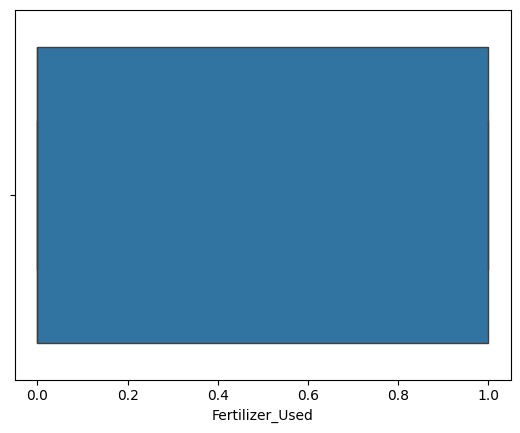

In [9]:
sns.boxplot(x=df['Fertilizer_Used'])

Insight: <br>
Berdasarkan boxplot fitur Fertilizer_Used, data terbagi pada dua kategori, yaitu penggunaan pupuk (1) dan tanpa pupuk (0). Tidak ditemukan outlier. Variabel ini bersifat biner dan menunjukkan bahwa sebagian besar data terdiri dari dua kelompok penggunaan pupuk yang relatif seimbang

<Axes: xlabel='Soil_Type'>

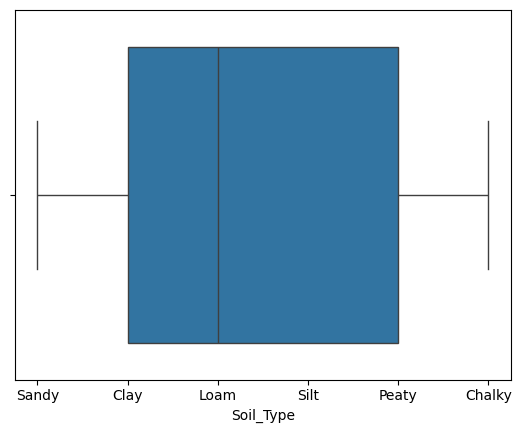

In [10]:
sns.boxplot(x=df['Soil_Type'])

Insight: <br>
Berdasarkan boxplot fitur Soil_Type, dataset terdiri dari enam tipe tanah utama: Sandy, Clay, Loam, Silt, Peaty, dan Chalky. Distribusi tiap tipe tanah terlihat seimbang tanpa adanya outlier yang signifikan. Ini menunjukkan bahwa semua tipe tanah terwakili dalam dataset dan dapat dianalisis lebih lanjut terhadap hasil panen.

<Axes: xlabel='Irrigation_Used'>

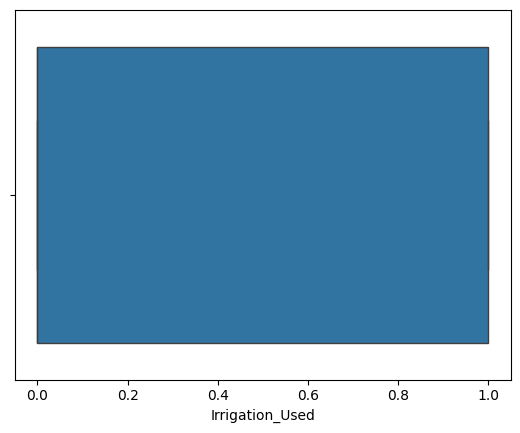

In [11]:
sns.boxplot(x=df['Irrigation_Used'])

Insight: <br>
Berdasarkan boxplot fitur Irrigation_Used, data terdiri dari dua kategori, yaitu 0 (tanpa irigasi) dan 1 (menggunakan irigasi). Distribusi terlihat seimbang, menunjukkan bahwa data mempertimbangkan kondisi pertanian dengan dan tanpa penggunaan irigasi secara proporsional. Tidak ditemukan adanya nilai outlier pada fitur ini.

<Axes: xlabel='Rainfall_mm'>

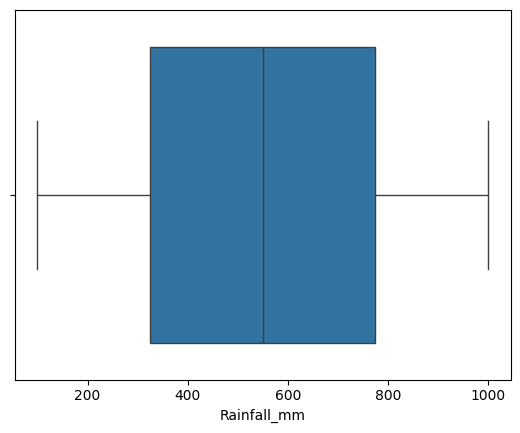

In [12]:
sns.boxplot(x=df['Rainfall_mm'])

Insight: <br>
Berdasarkan boxplot fitur Rainfall_mm, curah hujan yang tercatat berkisar antara 100 mm hingga 1000 mm dengan sebaran data yang cukup simetris. Tidak ditemukan outlier pada fitur ini, menunjukkan bahwa data curah hujan cukup bersih dan representatif terhadap kondisi yang diobservasi.

<Axes: xlabel='Region'>

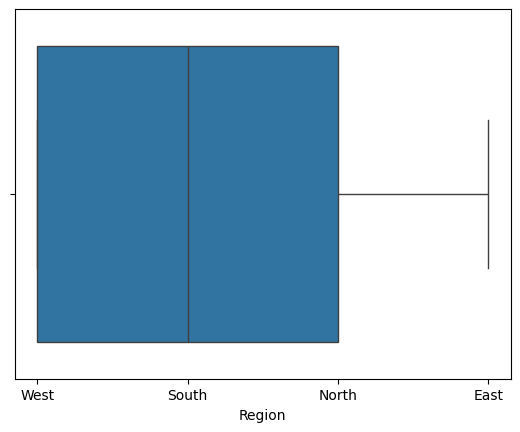

In [13]:
sns.boxplot(x=df['Region'])

Insight: <br>
Berdasarkan analisis boxplot pada fitur region menunjukkan pola distribusi yang konsisten tanpa adanya outlier signifikan. Region West, South, dan North memiliki distribusi hasil panen yang relatif serupa dengan median dan rentang nilai yang hampir identik, sementara region East menunjukkan hasil panen yang secara sistematis lebih rendah namun tetap konsisten dalam distribusinya.

<Axes: xlabel='Temperature_Celsius'>

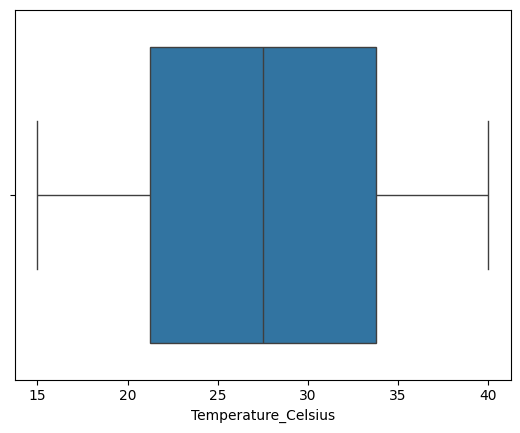

In [14]:
sns.boxplot(x=df['Temperature_Celsius'])

Insight: <br>
Berdasarkan boxplot fitur Temperature_Celsius, suhu yang tercatat berkisar antara 15°C hingga 40°C dengan sebaran data yang cukup simetris. Tidak ditemukan outlier pada fitur ini, menunjukkan bahwa data suhu cukup bersih dan representatif terhadap kondisi yang diobservasi.

<Axes: xlabel='Weather_Condition'>

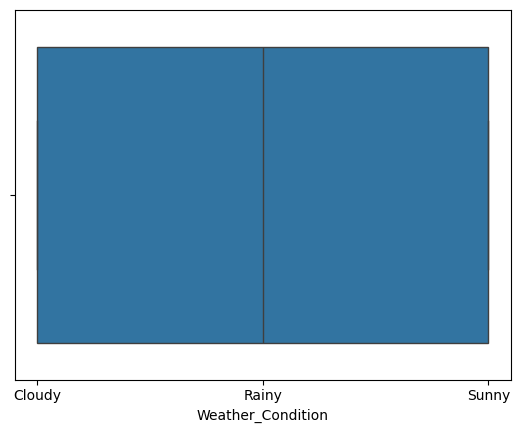

In [15]:
sns.boxplot(x=df['Weather_Condition'])

Insight: <br>
Berdasarkan boxplot fitur Weather_Condition, kondisi cuaca yang tercatat meliputi Cloudy, Rainy, dan Sunny, namun seluruh kategori tergabung dalam satu distribusi sehingga tidak terlihat perbedaan statistik di antara masing-masing kondisi. Hal ini menunjukkan bahwa perlu pemisahan lebih lanjut untuk menganalisis sebaran data tiap kategori cuaca secara individu. Tidak ditemukan indikasi outlier pada fitur ini, namun representasi datanya kurang informatif untuk perbandingan antar kondisi cuaca.

<Axes: xlabel='Yield_tons_per_hectare'>

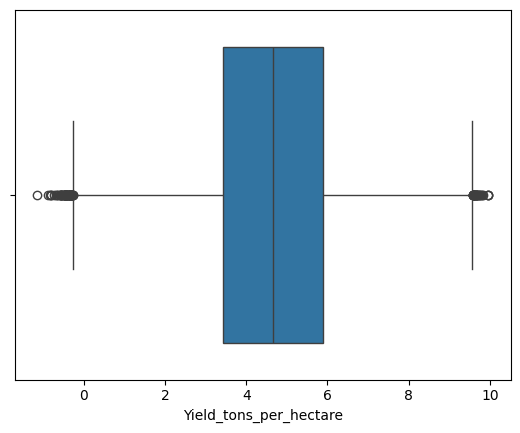

In [16]:
sns.boxplot(x=df['Yield_tons_per_hectare'])

Insight:
Berdasarkan boxplot fitur Yield_tons_per_hectare, hasil panen yang tercatat berkisar antara 0 hingga 10 ton per hektar dengan distribusi data yang sedikit condong ke tengah. Ditemukan beberapa outlier di sisi rendah dan tinggi, menunjukkan adanya nilai hasil panen yang jauh berbeda dari mayoritas data.

In [17]:
# Univariate EDA
numerical_features = ['Days_to_Harvest', 'Rainfall_mm', 'Temperature_Celsius', 'Yield_tons_per_hectare']
categorical_features = ['Crop', 'Irrigation_Used', 'Soil_Type','Fertilizer_Used', 'Weather_Condition', 'Region']

         Jumlah sampel  persentase
Crop                              
Maize           166824        16.7
Rice            166792        16.7
Barley          166777        16.7
Wheat           166673        16.7
Cotton          166585        16.7
Soybean         166349        16.6


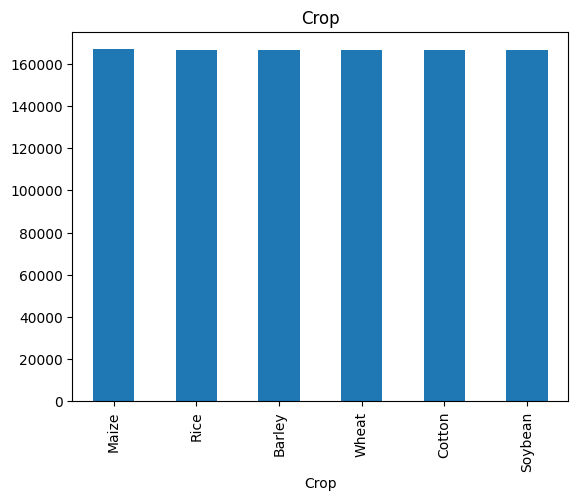

In [18]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

Insight:<br>
Berdasarkan diagram batang dan tabel, distribusi jumlah sampel untuk masing-masing jenis tanaman (Maize, Rice, Barley, Wheat, Cotton, dan Soybean) sangat merata, dengan masing-masing menyumbang sekitar 16,6% hingga 16,7% dari total data. Hal ini menunjukkan bahwa data antar jenis tanaman cukup seimbang, sehingga analisis yang melibatkan fitur Crop tidak akan bias terhadap salah satu jenis tanaman tertentu. Distribusi yang seimbang ini juga memperkuat validitas generalisasi hasil analisis terhadap keseluruhan dataset.

                 Jumlah sampel  persentase
Irrigation_Used                           
False                   500509        50.1
True                    499491        49.9


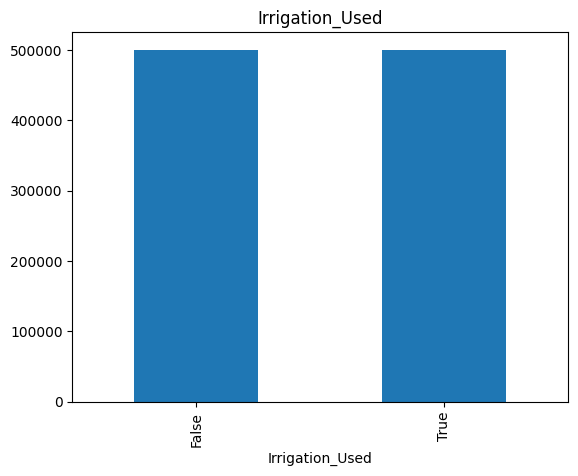

In [19]:
# Fitur Irrigation Used
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

Insight: <br>
Berdasarkan diagram batang dan tabel, distribusi penggunaan irigasi pada data sangat seimbang, dengan 50,1% sampel tidak menggunakan irigasi (False) dan 49,9% menggunakan irigasi (True). Keseimbangan ini menunjukkan bahwa data terkait fitur Irrigation_Used tidak berat sebelah, sehingga analisis perbandingan antara lahan yang menggunakan dan tidak menggunakan irigasi dapat dilakukan secara adil tanpa kekhawatiran adanya dominasi salah satu kategori.

           Jumlah sampel  persentase
Soil_Type                           
Sandy             167119        16.7
Loam              166795        16.7
Chalky            166779        16.7
Silt              166672        16.7
Clay              166352        16.6
Peaty             166283        16.6


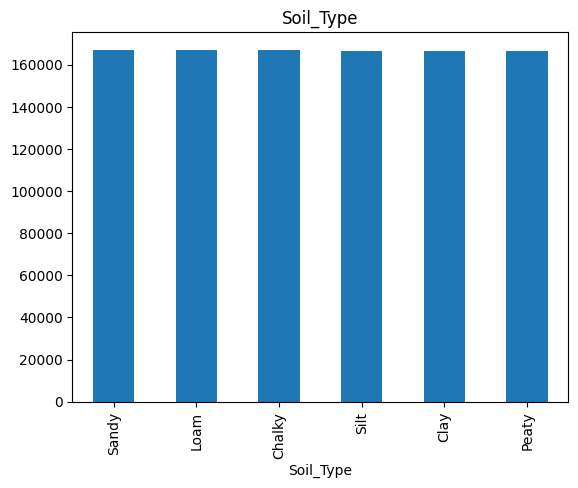

In [20]:
# Fitur Soil_Type
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

Insight: <br>
Berdasarkan diagram batang dan tabel, distribusi jenis tanah pada data sangat merata, dengan masing-masing jenis tanah (Sandy, Loam, Chalky, Silt, Clay, dan Peaty) memiliki persentase sekitar 16,6% hingga 16,7%. Keseimbangan ini menunjukkan bahwa data untuk fitur Soil_Type cukup seimbang, sehingga memungkinkan analisis performa tanaman terhadap berbagai jenis tanah tanpa bias terhadap salah satu tipe tanah tertentu.

                 Jumlah sampel  persentase
Fertilizer_Used                           
False                   500060        50.0
True                    499940        50.0


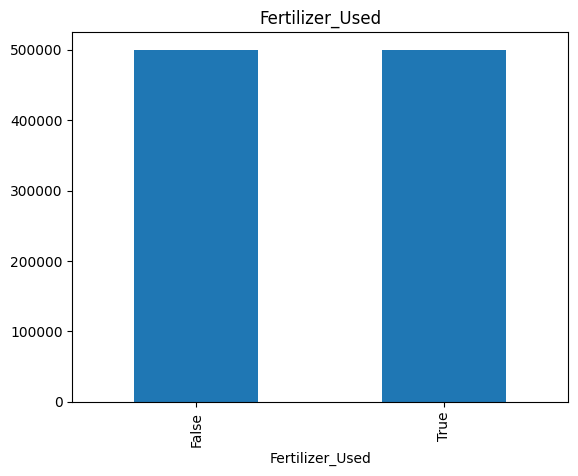

In [21]:
# Fertilizer_Used
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

Insight: <br>
Berdasarkan diagram batang fitur Fertilizer_Used, data terbagi menjadi dua kategori, yaitu "False" (tanpa pupuk) dan "True" (menggunakan pupuk). Distribusi terlihat sangat seimbang, di mana kategori "False" mencakup 500.060 sampel (50,0%) dan kategori "True" mencakup 499.940 sampel (50,0%). Perbedaan hanya sebesar 120 sampel, yang sangat kecil dalam dataset berukuran ini. Distribusi yang seimbang ini menunjukkan bahwa data mempertimbangkan kondisi pertanian dengan dan tanpa penggunaan pupuk secara proporsional, sehingga ideal untuk analisis statistik atau pemodelan tanpa bias terhadap salah satu kategori.

                   Jumlah sampel  persentase
Weather_Condition                           
Sunny                     333790        33.4
Rainy                     333561        33.4
Cloudy                    332649        33.3


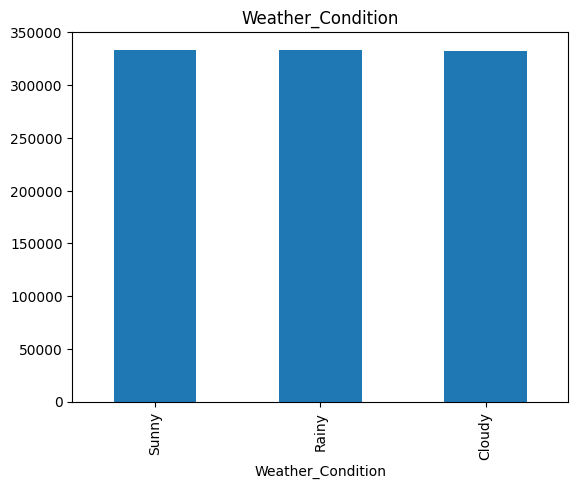

In [22]:
# Weather_Condition
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

Insight:<br>
Berdasarkan diagram batang fitur Weather_Condition, data terdistribusi ke dalam tiga kategori kondisi cuaca, yaitu "Sunny" (cerah), "Rainy" (hujan), dan "Cloudy" (berawan). Distribusi ini terlihat sangat seimbang di mana kategori "Sunny" mencakup 333.790 sampel (33,4%), "Rainy" mencakup 333.561 sampel (33,4%), dan "Cloudy" mencakup 332.649 sampel (33,3%). Ketiga kategori memiliki jumlah sampel yang hampir identik dengan perbedaan maksimal hanya sekitar 1.100 sampel. Distribusi yang merata ini menunjukkan bahwa data mempertimbangkan ketiga kondisi cuaca secara proporsional, sehingga sangat baik untuk analisis pengaruh cuaca terhadap hasil pertanian tanpa bias terhadap salah satu kondisi cuaca tertentu.

        Jumlah sampel  persentase
Region                           
North          250173        25.0
West           250074        25.0
South          250054        25.0
East           249699        25.0


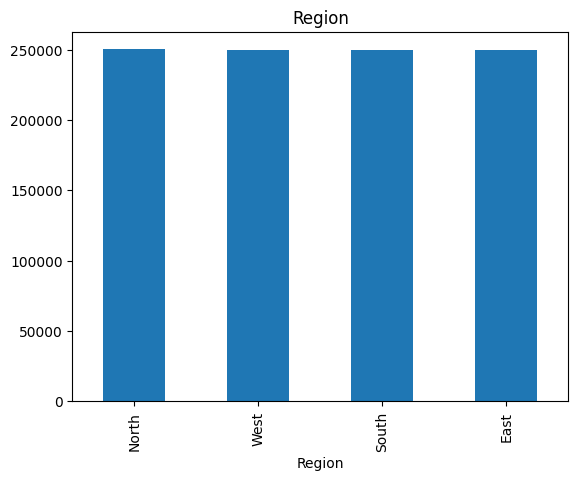

In [23]:
# Fitur Region
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_baru = pd.DataFrame({'Jumlah sampel': count, 'persentase': percent.round(1)})
print(df_baru)
count.plot(kind='bar', title=feature);

Insight:<br>
Berdasarkan diagram batang fitur Region, data terdistribusi ke dalam empat kategori wilayah, yaitu "North" (Utara), "West" (Barat), "South" (Selatan), dan "East" (Timur). Distribusi ini menunjukkan keseimbangan yang sangat baik di mana kategori "North" mencakup 250.173 sampel (25,0%), "West" mencakup 250.074 sampel (25,0%), "South" mencakup 250.054 sampel (25,0%), dan "East" mencakup 249.699 sampel (25,0%). Perbedaan jumlah sampel antar wilayah sangat minimal dengan selisih terbesar hanya sekitar 474 sampel. Distribusi yang merata ini mengindikasikan bahwa data telah dikumpulkan atau dikelompokkan secara proporsional dari keempat wilayah, sehingga analisis perbandingan antar wilayah dapat dilakukan tanpa kekhawatiran adanya bias terhadap wilayah tertentu.

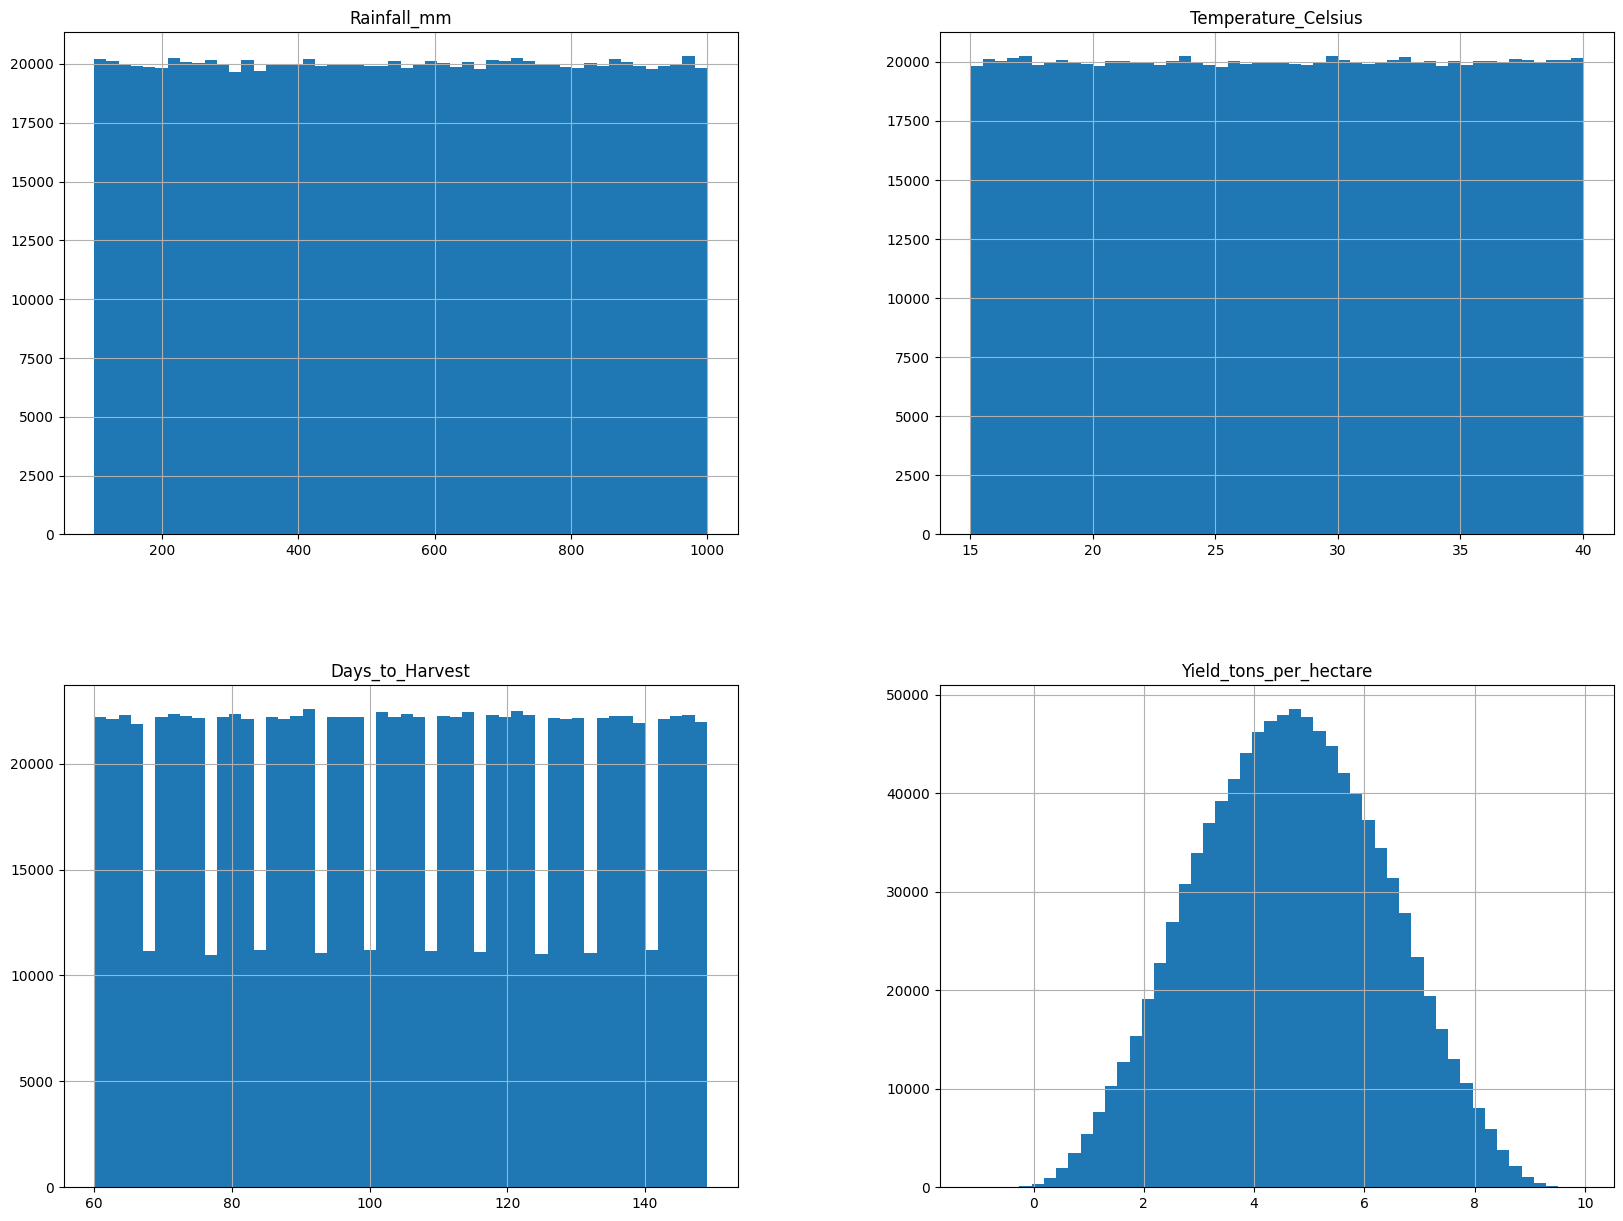

In [24]:
# Numerical features
df.hist(bins=50, figsize=(20,15))
plt.show()

Insight: <br>
1. Rainfall_mm (Curah Hujan):
Histogram curah hujan menunjukkan distribusi yang relatif merata di seluruh rentang nilai dari sekitar 100 mm hingga 1.000 mm. Tidak terlihat adanya kecenderungan atau konsentrasi pada nilai tertentu, yang mengindikasikan dataset mencakup berbagai kondisi curah hujan secara menyeluruh. Distribusi yang seragam ini memungkinkan analisis pengaruh curah hujan terhadap hasil panen pada berbagai tingkat intensitas. <br>

2. Temperature_Celsius (Suhu):
Histogram suhu menampilkan distribusi yang relatif merata antara 15°C hingga 40°C. Pola distribusi serupa dengan curah hujan, menunjukkan dataset mencakup beragam kondisi suhu. Rentang suhu yang luas ini sangat baik untuk menganalisis bagaimana tanaman beradaptasi dan berproduksi pada berbagai kondisi iklim, dari sejuk hingga sangat panas. <br>

3. Days_to_Harvest (Hari hingga Panen):
Histogram ini menunjukkan distribusi yang cukup seragam dalam rentang sekitar 60 hingga 140 hari. Tidak ada puncak yang signifikan, mengindikasikan variasi yang merata dalam waktu panen. Data ini menggambarkan keberagaman jenis tanaman atau varietas yang memiliki periode pertumbuhan berbeda-beda. <br>

4. Yield_tons_per_hectare (Hasil Panen per Hektar):
Berbeda dengan tiga fitur sebelumnya, histogram hasil panen menunjukkan distribusi normal yang jelas dengan bentuk lonceng. Puncak distribusi berada di sekitar 4-5 ton per hektar. Distribusi ini menandakan bahwa sebagian besar hasil panen terkonsentrasi di sekitar nilai tersebut, dengan semakin sedikit jumlah sampel saat bergerak menuju hasil panen yang sangat rendah (0-1 ton) atau sangat tinggi (8-10 ton). Pola ini mencerminkan kecenderungan alami dalam produktivitas pertanian, di mana hasil ekstrem (sangat tinggi atau sangat rendah) lebih jarang terjadi dibandingkan hasil yang moderat.

<ipython-input-25-a9dcd5f5da16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Yield_tons_per_hectare', kind='bar', dodge=False, data=df, aspect=2, height=3, palette='Set3')
<ipython-input-25-a9dcd5f5da16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Yield_tons_per_hectare', kind='bar', dodge=False, data=df, aspect=2, height=3, palette='Set3')
<ipython-input-25-a9dcd5f5da16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='Yield_tons_per_hectare', kind='bar', dodge=False, data=df, aspect=2, height=3, palet

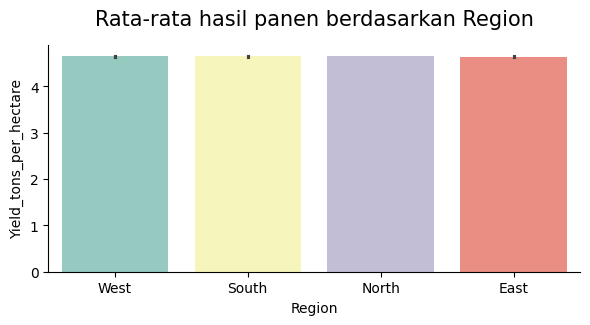

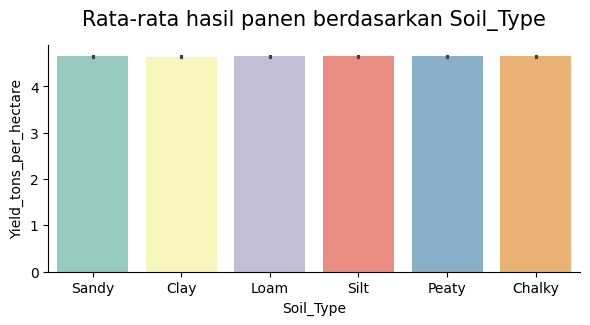

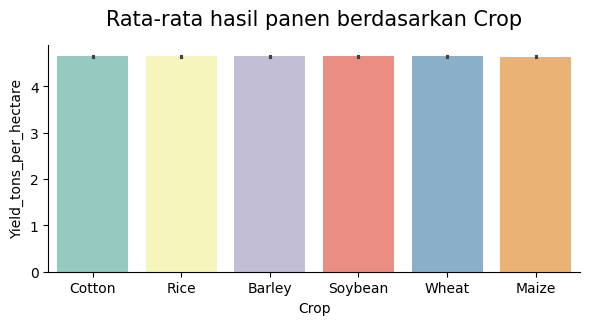

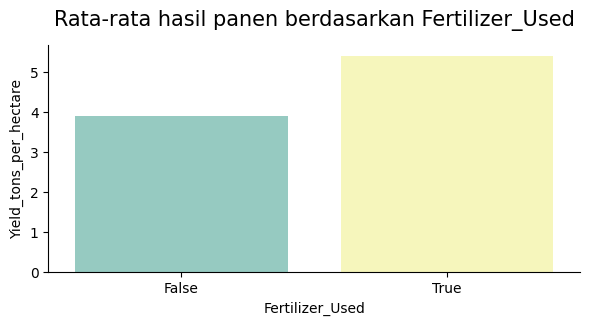

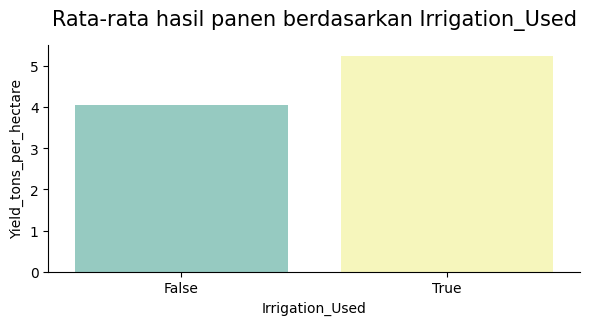

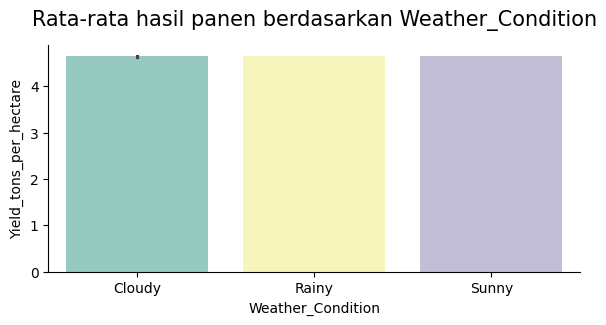

In [25]:
# Multivariate EDA
cat_features = df.select_dtypes(include=['object', 'bool']).columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='Yield_tons_per_hectare', kind='bar', dodge=False, data=df, aspect=2, height=3, palette='Set3')
  plt.title(f'Rata-rata hasil panen berdasarkan {col}', y=1.05, size=15)

Insight: <br>
1. Grafik "Rata-rata hasil panen berdasarkan Region" menunjukkan distribusi hasil panen yang sangat merata di semua wilayah (West, South, North, dan East), dengan nilai sekitar 4-4,5 ton per hektare di tiap region. Keseragaman ini mengindikasikan bahwa faktor geografis tidak menjadi penentu signifikan dalam perbedaan produktivitas, yang mungkin menunjukkan adanya standarisasi praktik pertanian yang baik, kondisi iklim dan tanah yang relatif serupa, atau penggunaan varietas tanaman dengan produktivitas setara di seluruh wilayah. <br>
2. Grafik "Rata-rata hasil panen berdasarkan Soil_Type" menunjukkan distribusi hasil panen yang sangat merata di seluruh jenis tanah yang berbeda (Sandy, Clay, Loam, Silt, Peaty, dan Chalky), dengan nilai sekitar 4.5 ton per hektare untuk setiap tipe tanah. Keseragaman ini mengindikasikan bahwa jenis tanah tampaknya tidak menjadi faktor pembeda yang signifikan dalam produktivitas hasil panen. Hal ini dapat menunjukkan bahwa para petani telah berhasil mengadaptasi praktik pertanian mereka untuk mengoptimalkan hasil di berbagai kondisi tanah, seperti penyesuaian pemupukan, irigasi, atau pemilihan varietas tanaman yang tepat untuk setiap jenis tanah. <br>
3. Grafik "Rata-rata hasil panen berdasarkan Crop" menunjukkan distribusi hasil panen yang hampir identik di antara semua jenis tanaman (Cotton, Rice, Barley, Soybean, Wheat, dan Maize), dengan produktivitas sekitar 4.5 ton per hektare untuk setiap tanaman. Keseragaman yang konsisten ini mengindikasikan bahwa jenis tanaman tidak menjadi faktor pembeda dalam produktivitas pada dataset ini. Hal ini menarik karena secara alami berbagai jenis tanaman biasanya memiliki karakteristik hasil panen yang berbeda-beda. <br>
4. Grafik "Rata-rata hasil panen berdasarkan Fertilizer_Used" menunjukkan perbedaan yang signifikan antara penggunaan pupuk dan tidak. Tanaman yang diberi pupuk (True) menghasilkan sekitar 5.2 ton per hektare, sedangkan tanaman tanpa pupuk (False) hanya menghasilkan sekitar 4 ton per hektare. Perbedaan ini menunjukkan bahwa penggunaan pupuk memberikan peningkatan hasil panen sekitar 30%. Berbeda dengan grafik-grafik sebelumnya yang menunjukkan keseragaman hasil berdasarkan region, jenis tanah, dan jenis tanaman, faktor penggunaan pupuk terlihat sebagai variabel yang memiliki pengaruh nyata terhadap produktivitas.
5. Grafik "Rata-rata hasil panen berdasarkan Irrigation_Used" menunjukkan perbedaan yang signifikan dalam produktivitas antara lahan dengan dan tanpa sistem irigasi. Lahan yang menggunakan irigasi (True) menghasilkan sekitar 5.2 ton per hektare, sementara lahan tanpa irigasi (False) hanya mencapai sekitar 4 ton per hektare. Peningkatan hasil panen sebesar kurang lebih 30% ini menegaskan pentingnya sistem irigasi dalam praktik pertanian.
6. Grafik "Rata-rata hasil panen berdasarkan Weather_Condition" menunjukkan hasil panen yang relatif seragam di antara tiga kondisi cuaca berbeda (Cloudy, Rainy, dan Sunny), dengan nilai sekitar 4.5 ton per hektare untuk semua kondisi

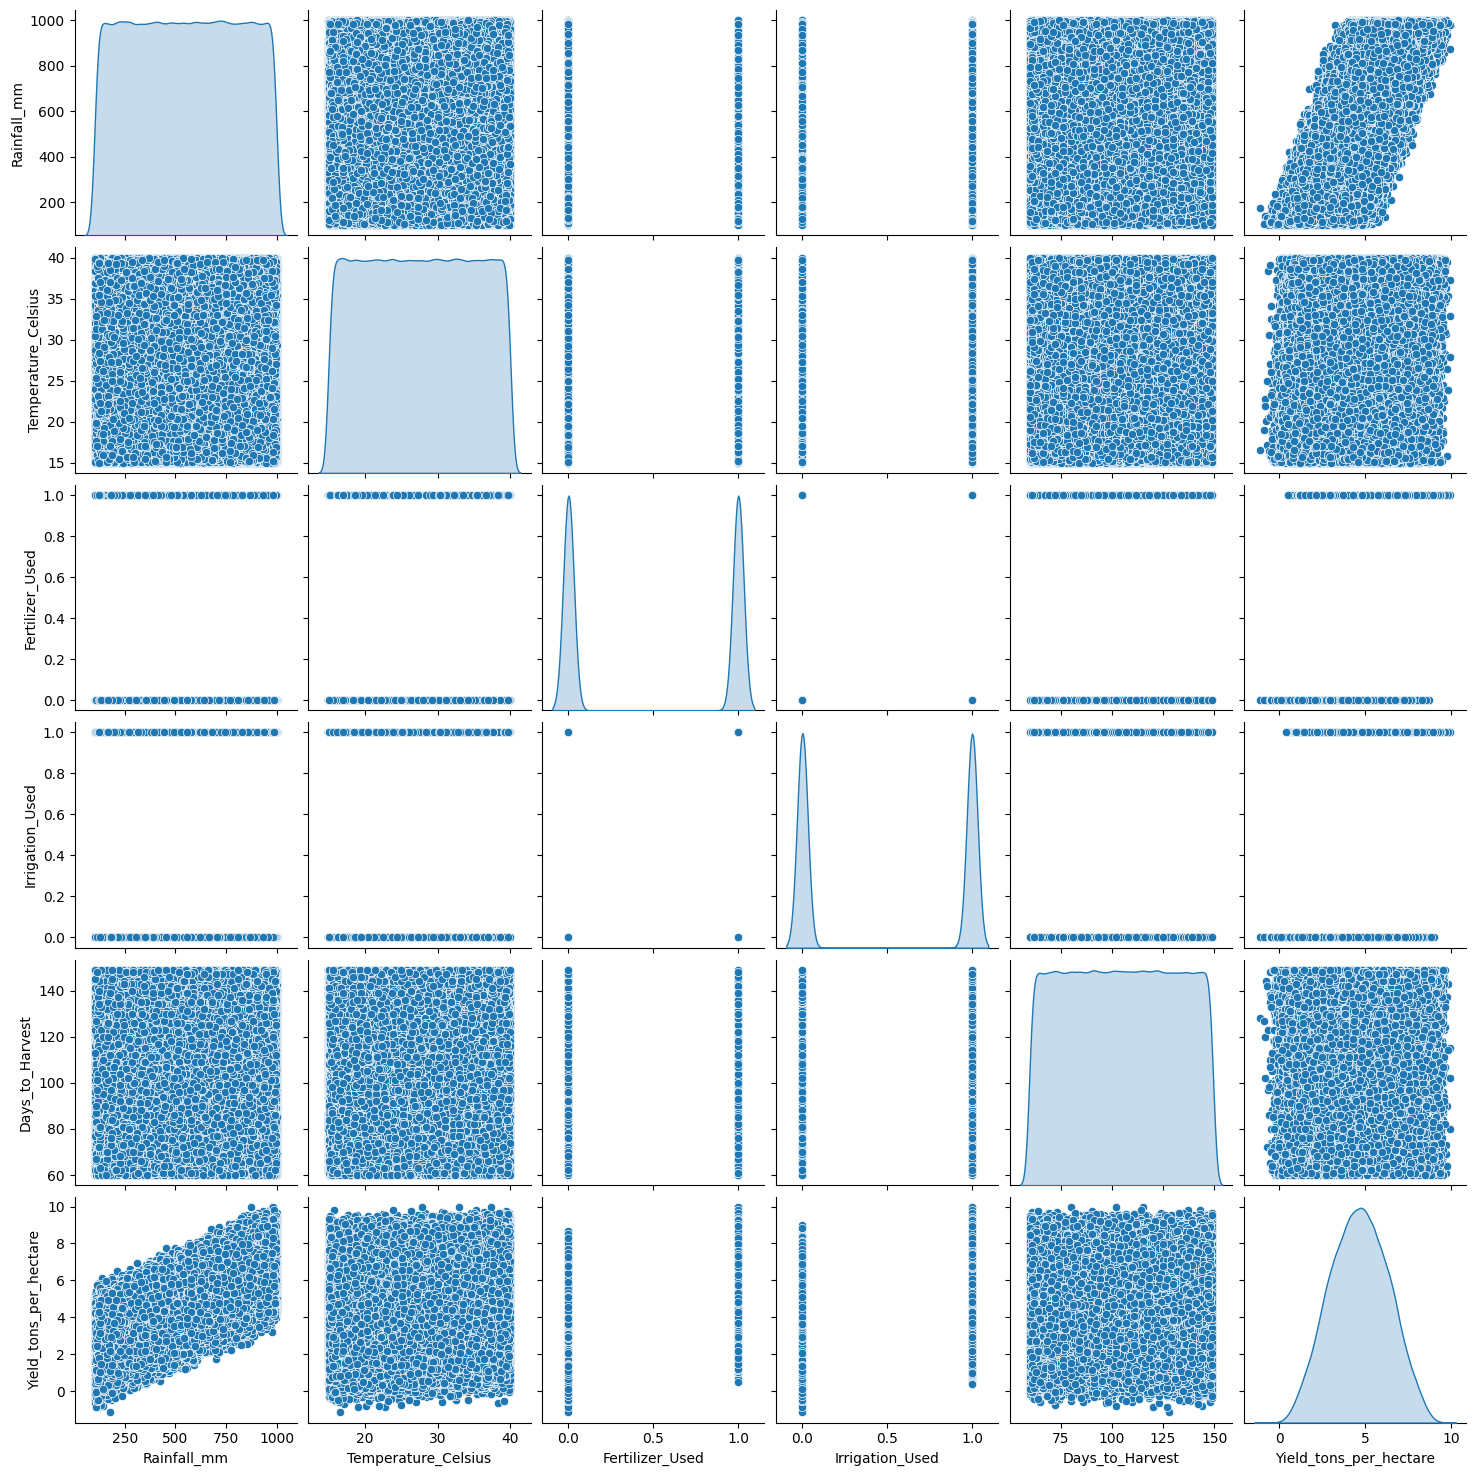

In [26]:
# Numerical Features
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind='kde')

Insight: <br>
1. Hubungan curah hujan (Rainfall_mm) dengan hasil panen:
Terlihat korelasi positif yang kuat antara curah hujan dan hasil panen (Yield_tons_per_hectare), ditunjukkan pada scatter plot di pojok kiri bawah yang membentuk tren naik.
Data curah hujan tampaknya memiliki distribusi yang luas antara 250-1000 mm.

2. Fertilizer_Used dan Irrigation_Used:
Kedua variabel ini biner (0 atau 1) seperti terlihat dari distribusinya.
Plot-plot yang melibatkan kedua variabel ini menunjukkan peningkatan hasil panen pada nilai 1 (True), konsisten dengan analisis bar chart sebelumnya.

3. Temperature_Celsius:
Distribusi suhu berkisar antara 15-40°C.
Tidak terlihat korelasi yang jelas antara suhu dan hasil panen pada scatter plot.

4. Days_to_Harvest:
Rentang waktu panen berkisar antara 60-150 hari.
Tampaknya tidak ada korelasi yang kuat antara waktu panen dan hasil akhir.


5. Yield_tons_per_hectare:
Distribusi hasil panen (panel paling kanan bawah) menunjukkan bentuk normal dengan mayoritas nilai berkisar 4-5 ton/hektar.
Diantara semua variabel, curah hujan memiliki korelasi positif terkuat dengan hasil panen, diikuti oleh penggunaan pupuk dan irigasi.


6. Interaksi antar variabel:
Antara Rainfall_mm dan Yield_tons_per_hectare terdapat pola diagonal yang jelas, menunjukkan hubungan linear positif yang kuat.
Curah hujan tampaknya menjadi faktor penentu utama hasil panen, bahkan dibandingkan dengan faktor pertanian yang dapat dikontrol seperti pupuk dan irigasi.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

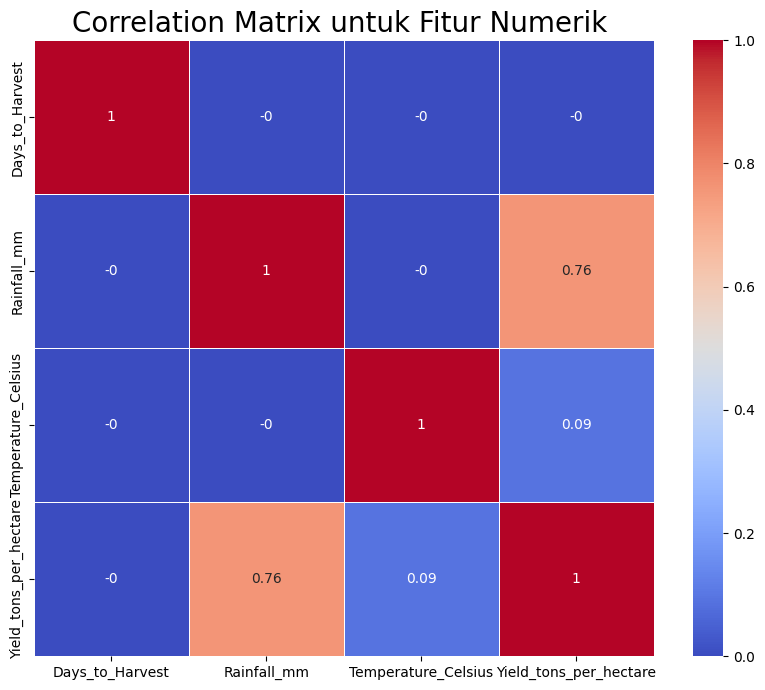

In [27]:
plt.figure(figsize=(10,8))
correlation_matrix = df[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,)
plt.title('Correlation Matrix untuk Fitur Numerik ', size=20)

Insight: <br>
Matriks korelasi untuk fitur numerik menunjukkan pola hubungan yang sangat jelas di antara variabel-variabel dalam dataset pertanian. Temuan paling signifikan adalah korelasi positif yang kuat (0.76) antara curah hujan (Rainfall_mm) dan hasil panen (Yield_tons_per_hectare), yang mengkonfirmasi pengamatan dari scatter plot sebelumnya. Ini menunjukkan bahwa air merupakan faktor kritis dalam menentukan produktivitas tanaman. Sementara itu, suhu (Temperature_Celsius) hanya menunjukkan korelasi yang sangat lemah (0.09) dengan hasil panen, mengindikasikan bahwa dalam dataset ini, suhu tidak menjadi faktor pembeda yang signifikan untuk produktivitas. Menariknya, jumlah hari hingga panen (Days_to_Harvest) memiliki korelasi yang hampir nol dengan hasil panen, yang menunjukkan bahwa durasi siklus tanam tidak mempengaruhi hasil akhir.

## Data Preparation

In [28]:
# Handling outliers untuk kolom Yield_tons_per_hectare
df_numeric = df['Yield_tons_per_hectare']
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))]

# cek ukuran dataset
df.shape

(999916, 10)

Interpretasi: <br>
Dengan menggunakan metode IQR, kita berhasil mendeteksi dan menghapus 84 baris data ekstrem pada kolom Yield_tons_per_hectare, menyisakan 999,916 baris yang lebih bersih dan stabil untuk digunakan dalam pelatihan model.


In [29]:
# Train-Test-Split
X = df.drop(['Yield_tons_per_hectare', 'Region', 'Soil_Type', 'Crop', 'Days_to_Harvest', 'Weather_Condition'], axis=1)
y= df['Yield_tons_per_hectare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Interpretasi: <br>
Dengan membuang variabel-variabel yang tidak memberikan kontribusi signifikan terhadap hasil panen (Region, Soil_Type, Crop, Weather_Condition, dan Days_to_Harvest). Model akan dibangun berdasarkan fitur-fitur yang tersisa, khususnya Rainfall_mm (korelasi 0.76 dengan hasil panen), Fertilizer_Used dan Irrigation_Used (keduanya menunjukkan peningkatan hasil sekitar 30%), serta Temperature_Celsius, menciptakan model yang lebih sederhana namun tetap mempertahankan variabel-variabel dengan kekuatan prediktif tinggi.

In [30]:
# Mengecek jumlah sampel pada masing-masing bagian
print(f'Jumlah sampel X_train: {X_train.shape[0]}, Jumlah sampel y_train: {y_train.shape[0]}')
print(f'Jumlah sampel X_test: {X_test.shape[0]}, Jumlah sampel y_test: {y_test.shape[0]}')

Jumlah sampel X_train: 799932, Jumlah sampel y_train: 799932
Jumlah sampel X_test: 199984, Jumlah sampel y_test: 199984


Interpretasi: <br>
Hasil pembagian data menunjukkan bahwa dataset telah berhasil dipisahkan menjadi data pelatihan dan pengujian dengan proporsi yang ideal, yaitu sekitar 80% untuk pelatihan (799.932 sampel) dan 20% untuk pengujian (199.984 sampel). Jumlah sampel pada setiap bagian juga konsisten antara fitur (X) dan target (y), menandakan bahwa tidak ada data yang hilang atau terpotong saat proses pemisahan.

In [31]:
# Standarisasi
numerical_features = ['Rainfall_mm']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_train[numerical_features].head()

,Rainfall_mm
638188,-1.053917
463031,1.321820
145951,0.462717
33479,-0.627447
360784,-1.071111


Interpretasi: <br>
Standarisasi pada fitur Rainfall_mm berhasil dilakukan dengan mengubah skala nilainya menjadi distribusi dengan rata-rata 0 dan standar deviasi 1, sehingga setiap nilai mencerminkan seberapa jauh ia dari rata-rata dalam satuan deviasi standar

In [32]:
X_train[numerical_features].describe().round(4)

,Rainfall_mm
count,799932.0000
mean,0.0000
std,1.0000
min,-1.7318
25%,-0.8659
50%,0.0006
75%,0.8653
max,1.7312


Interpretasi: <br>
Hasil deskripsi statistik setelah standarisasi pada fitur Rainfall_mm menunjukkan bahwa data telah memiliki rata-rata sebesar 0 dan standar deviasi sebesar 1, yang menandakan proses scaling telah berhasil. Nilai-nilai pada fitur tersebut kini berada dalam rentang sekitar -1.73 hingga 1.73, dan nilai tengah (median) sangat mendekati nol, menunjukkan distribusi yang simetris

Model Development

In [33]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns = ['Random Forest', 'Linear Regression'])

Penjelasan: <br>
Proses di atas digunakan untuk membuat sebuah DataFrame kosong dengan nama models yang akan digunakan untuk menyimpan nilai Mean Squared Error (MSE) dari masing-masing model. DataFrame ini memiliki dua baris yaitu 'train_mse' dan 'test_mse', yang masing-masing akan diisi dengan hasil evaluasi model pada data pelatihan dan pengujian. Kolomnya terdiri dari dua model yang dibandingkan, yaitu 'Random Forest' dan 'Linear Regression'

Random Forest

In [34]:
RF = RandomForestRegressor(n_estimators = 50, max_depth = 14, random_state = 123, n_jobs = -1)
RF.fit(X_train, y_train)

models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred = RF.predict(X_train), y_true=y_train)

Penjelasan: <br>
Proses di atas melibatkan pelatihan model Random Forest Regressor dengan parameter n_estimators=50 (jumlah pohon), max_depth=14 (kedalaman maksimum setiap pohon), dan random_state=123 untuk hasil yang konsisten. Model dilatih menggunakan data pelatihan (X_train dan y_train). Setelah model selesai dilatih, dilakukan prediksi terhadap data pelatihan, lalu hasil prediksinya dibandingkan dengan nilai aktual (y_train) untuk menghitung Mean Squared Error (MSE). Nilai MSE tersebut kemudian disimpan dalam DataFrame models pada baris 'train_mse' dan kolom 'Random Forest', sebagai metrik evaluasi performa model terhadap data pelatihan.

Linear Regression

In [35]:
LN = LinearRegression()
LN.fit(X_train, y_train)

models.loc['train_mse', 'Linear Regression'] = mean_squared_error(y_pred = LN.predict(X_train), y_true = y_train )

Penjelasan: <br>
Proses di atas melakukan pelatihan model Linear Regression menggunakan data pelatihan (X_train dan y_train). Setelah model dilatih, dilakukan prediksi terhadap X_train, dan hasil prediksi tersebut dibandingkan dengan nilai aktual y_train untuk menghitung Mean Squared Error (MSE). Nilai MSE yang dihasilkan mencerminkan seberapa baik model Linear Regression mampu menyesuaikan diri dengan data pelatihan. Nilai ini kemudian disimpan dalam DataFrame models pada baris 'train_mse' dan kolom 'Linear Regression', sebagai bagian dari evaluasi performa model.

## Evaluation Model


In [36]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


Penjelasan: <br>
Proses di atas menerapkan standarisasi pada data pengujian (X_test) untuk fitur numerik yang telah ditentukan sebelumnya (numerical_features), dengan menggunakan transformasi yang sudah dipelajari dari data pelatihan melalui objek scaler. Hal ini penting untuk memastikan bahwa data pengujian diproses dengan skala yang sama seperti data pelatihan, sehingga model dapat memberikan prediksi yang konsisten dan akurat. Hasil transformasi kemudian disimpan kembali ke kolom yang sama di X_test

In [37]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['RF', 'LN'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'RF': RF, 'LN' : LN}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

# Panggil mse
mse

,train,test
RF,0.22603,0.252537
LN,0.250415,0.249838


Interpretasi:<br>
Hasil evaluasi model menunjukkan bahwa Random Forest (RF) memiliki performa sedikit lebih baik pada data pelatihan dengan nilai metrik 0.22603 dibandingkan dengan Linear Regression (LN) yang mencapai 0.250415. Namun, ketika diuji pada data pengujian, RF mengalami sedikit penurunan performa dengan nilai 0.252537, sementara LN tetap stabil di 0.249838. Hal ini mengindikasikan bahwa meskipun RF lebih unggul dalam pelatihan, kedua model menunjukkan performa yang relatif sebanding pada data pengujian, dengan RF sedikit lebih cenderung overfitting pada data pelatihan dibandingkan dengan LN

In [38]:
# Uji
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test[:1]}
for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(4)

pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_LN
382393,1.676764,2.0065,1.9964


Interpretasi:<br>
Hasil perbandingan antara nilai sebenarnya (y_true) dan prediksi dari kedua model menunjukkan bahwa pada sampel dengan indeks 382393, nilai asli adalah 1.676764, sedangkan prediksi dari Random Forest (RF) adalah 2.0065 dan prediksi dari Linear Regression (LN) adalah 1.9964. Kedua model memberikan prediksi yang sedikit lebih tinggi daripada nilai sebenarnya, dengan RF memiliki sedikit selisih yang lebih besar dibandingkan LN. Hal ini menunjukkan bahwa kedua model memiliki kecenderungan untuk overestimate pada sampel ini, namun LN memberikan prediksi yang lebih dekat dengan nilai aktual.